In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import yfinance as yf

In [111]:
# Define the stock symbol (in this case, Tesla)
stock_symbol = "TSLA"

# Define the start and end dates for the data
start_date = "2022-01-01"
end_date = "2024-01-01"

# Use yfinance to fetch the data
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


reset the index

In [112]:
tesla_data.reset_index(inplace=True)

In [113]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700


#   Webscraping to Extract Tesla Revenue Data

In [6]:
import requests
from bs4 import BeautifulSoup

In [15]:
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [51]:
tesla_data=requests.get(url).text

#print(tesla_data)

# Parse the HTML content of the page

In [21]:
soup=BeautifulSoup(tesla_data,'html5lib')

In [23]:
# extract data from the table

tesla_revenue=pd.read_html(url)

In [39]:
tesla_revenue_dataframe=tesla_revenue[1]  # revenue dataframe was in index 1

In [30]:
# reset the columns name to Date and Revenue
tesla_revenue_dataframe.columns=['Date','Revenue']

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [32]:
tesla_revenue_dataframe['Revenue']=tesla_revenue_dataframe['Revenue'].str.replace(',|\$',"")

C:\Users\hi\AppData\Local\Temp\ipykernel_11144\61884094.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue_dataframe['Revenue']=tesla_revenue_dataframe['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.

In [33]:
tesla_revenue_dataframe.dropna(inplace=True)

In [34]:
tesla_revenue_dataframe=tesla_revenue_dataframe[tesla_revenue_dataframe['Revenue'] !=""]

In [37]:
tesla_revenue_dataframe.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#  using yfinance to extract gamestop stock data

In [41]:
# Specify the stock symbol and the time period
stock_symbol = "GME"
start_date = "2022-01-01"
end_date = "2024-01-01"

Download historical stock data for GameStop

In [42]:
gme_data=yf.download(stock_symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [99]:
gme_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,37.307499,39.845001,37.302502,38.209999,38.209999,5654800
2022-01-04,38.042500,38.247501,35.762501,37.227501,37.227501,7339600
2022-01-05,37.097500,37.212502,32.287498,32.342499,32.342499,13585600
2022-01-06,33.209999,34.424999,30.285000,32.757500,32.757500,24206000
2022-01-07,39.942501,40.077499,33.125000,35.154999,35.154999,48549200


# Web scraping to extract GameStop Revenue data

In [49]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [62]:
GME_data=requests.get(url).text

#print(GME_data)

In [67]:
GME_data=pd.read_html(url)    # extract data using pd.read_html

In [71]:
GME_revenue_df=GME_data[1]    # revenue data frame is in index 1

In [73]:
GME_revenue_df.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [76]:
GME_revenue_df.columns=['Date','Revenue']   # reset the columns name

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [77]:
GME_revenue_df['Revenue']=GME_revenue_df['Revenue'].str.replace(',|\$',"")

C:\Users\hi\AppData\Local\Temp\ipykernel_11144\1656405951.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  GME_revenue_df['Revenue']=GME_revenue_df['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.

In [78]:
GME_revenue_df.dropna(inplace=True)

In [79]:
GME_revenue_df.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#  Ploting Tesla stock graph

In [114]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700


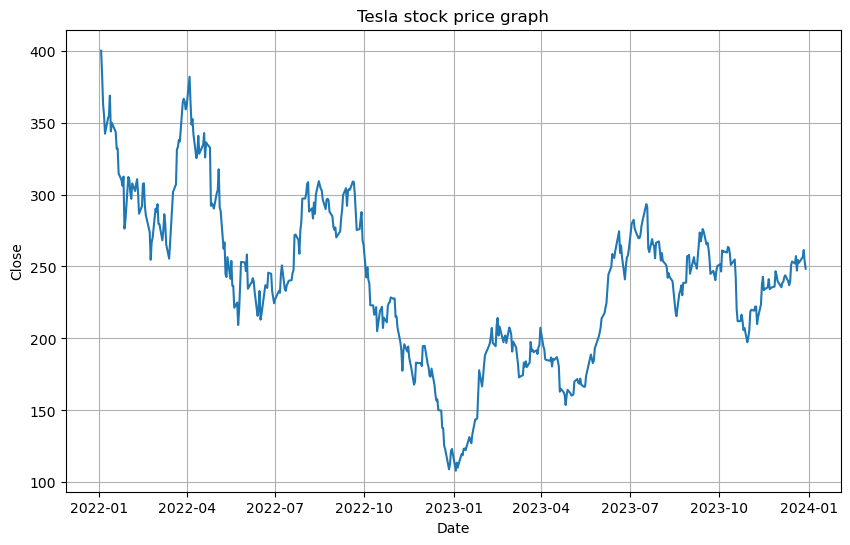

In [115]:
plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'],tesla_data['Close'])
plt.title('Tesla stock price graph')

plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)

#  Ploting GME stock price

In [100]:
gme_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,37.307499,39.845001,37.302502,38.209999,38.209999,5654800
2022-01-04,38.042500,38.247501,35.762501,37.227501,37.227501,7339600
2022-01-05,37.097500,37.212502,32.287498,32.342499,32.342499,13585600
2022-01-06,33.209999,34.424999,30.285000,32.757500,32.757500,24206000
2022-01-07,39.942501,40.077499,33.125000,35.154999,35.154999,48549200


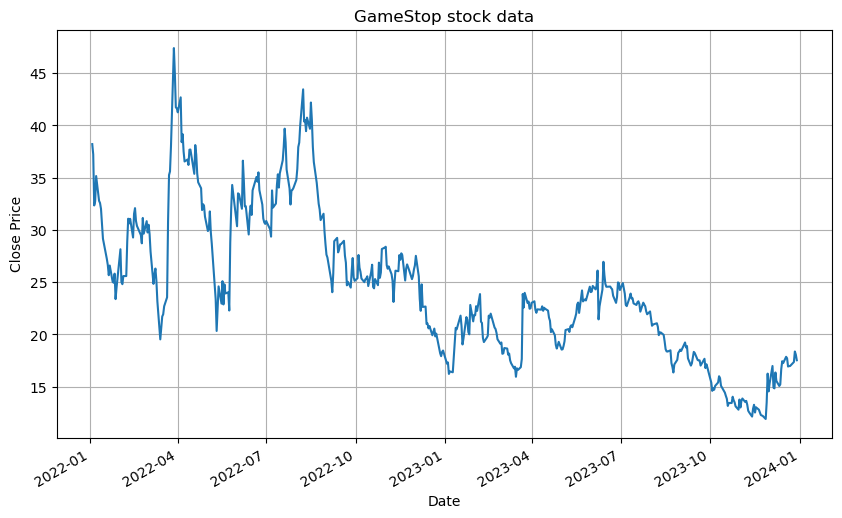

In [110]:
plt.figure(figsize=(10,6))
gme_data['Close'].plot()
plt.title('GameStop stock data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)